# KMean Clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\hp\\EXCELR\\CLASS NOTES'

In [4]:
os.chdir('F:\jupiter notebook')

In [5]:
driver=pd.read_csv('driver-data.csv')

In [6]:
driver

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [7]:
features=driver.drop('id',axis=1)

In [8]:
features

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [9]:
from sklearn.cluster import KMeans

In [10]:
kmean=KMeans(n_clusters=3)

In [11]:
cluster=kmean.fit(features)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
cluster.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [13]:
np.unique(cluster.labels_)

array([0, 1, 2])

In [14]:
cluster.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [177.83509615,  70.28846154],
       [180.34311782,  10.52011494]])

In [15]:
driver['cluster']=cluster.labels_

In [16]:
driver

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,2
3996,3423312600,176.17,5,2
3997,3423312921,170.91,12,2
3998,3423313630,176.14,5,2


In [17]:
driver[driver['cluster']==1]

,id,mean_dist_day,mean_over_speed_perc,cluster
3200,3423314190,179.22,95,1
3201,3423314144,192.34,69,1
3202,3423314442,140.25,92,1
3203,3423313001,184.28,70,1
3204,3423311047,200.58,50,1
...,...,...,...,...
3315,3423313871,177.20,87,1
3316,3423310955,182.40,83,1
3317,3423314016,189.88,97,1
3318,3423310913,214.17,73,1


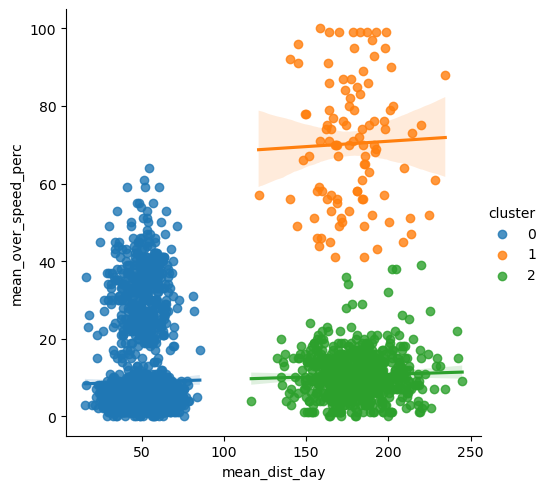

In [18]:
sns.lmplot(data=driver,x='mean_dist_day',y='mean_over_speed_perc',hue='cluster')

In [19]:
w=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    w.append(kmeans.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

In [20]:
print(w)

[12184626.129627982, 1316420.8509477184, 992634.0606702471, 719601.1096991899, 534744.506860941, 372837.9587660454, 319753.6544125788, 276886.4472751544, 253025.39457068522, 230338.7316384447]


In [21]:
kmeans.inertia_

230338.7316384447

Text(0, 0.5, 'Inertia')

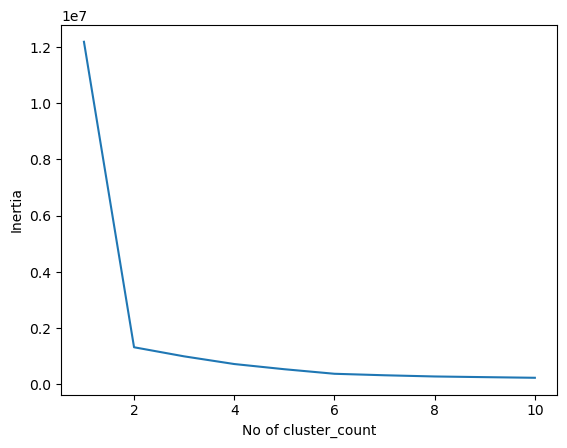

In [22]:
plt.plot(range(1,11),w)
plt.xlabel('No of cluster_count')
plt.ylabel('Inertia')

# Hierarchical Clustering

In [23]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error,silhouette_score

In [24]:
zoo=pd.read_csv('zoo.csv')

In [25]:
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [26]:
features=zoo.drop(['animal_name','class_type'],axis=1)

In [27]:
features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


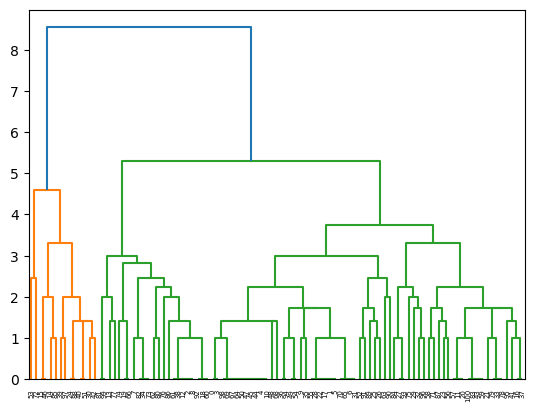

In [28]:
#this method si used to find the optimal cluster value
#average,complete,single,centroid
dendrogram=sch.dendrogram(sch.linkage(features,method='complete'))

In [29]:
aglomerative=AgglomerativeClustering(n_clusters=6,linkage='complete')

In [30]:
aglomerative_=aglomerative.fit(features)

In [31]:
aglomerative_.labels_

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 4, 2, 2, 0, 0, 4, 1, 2, 2, 4, 4,
       1, 4, 0, 1, 1, 5, 1, 5, 0, 1, 5, 4, 2, 1, 1, 4, 2, 0, 0, 4, 0, 4,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 3, 1, 1, 4, 4, 4, 4, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 4, 3, 2, 2, 5, 2, 2, 4, 4, 2, 2, 2, 4, 5, 0, 2, 4,
       0, 1, 1, 1, 2, 5, 1, 4, 5, 0, 1, 2, 4], dtype=int64)

In [32]:
silhouette_score(features,aglomerative_.labels_)

0.42405313809442846

# DBscan Clustering

In [33]:
from sklearn.cluster import DBSCAN

In [34]:
df=pd.read_csv('DB_dataset.csv')

In [35]:
df

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388668
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


In [36]:
df.describe()

,Weight,Height
count,500.000000,500.000000
mean,61.270240,169.515781
std,5.196976,4.805095
min,50.433644,160.182164
25%,57.772791,166.607599
50%,61.961518,169.726252
75%,65.439332,172.837284
max,70.700456,178.894770


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
std=StandardScaler()

In [39]:
ndf=pd.DataFrame(std.fit_transform(df),columns=df.columns)

In [40]:
ndf

,Weight,Height
0,1.115742,1.368788
1,1.451113,1.848408
2,-0.065368,0.160139
3,-0.295929,-0.171612
4,0.801458,0.884926
...,...,...
495,-0.249097,0.034156
496,0.992642,1.064476
497,-1.476478,-1.582524
498,-2.087262,-1.816746


In [41]:
min_sample=range(1,10)
eps=[0.1,0.2,0.3,0.4,0.5,0.6]

In [42]:
output=[]
for mn in min_sample:
    for ep in eps:
        labels=DBSCAN(eps=ep,min_samples=mn).fit(ndf).labels_
        score= silhouette_score(ndf,labels)
        output.append((mn,ep,score))

In [43]:
output

[(1, 0.1, -0.04299681057231643),
 (1, 0.2, 0.4246458392966885),
 (1, 0.3, 0.6636830126381724),
 (1, 0.4, 0.6636830126381724),
 (1, 0.5, 0.6636830126381724),
 (1, 0.6, 0.6636830126381724),
 (2, 0.1, 0.2832200472847609),
 (2, 0.2, 0.4246458392966885),
 (2, 0.3, 0.6636830126381724),
 (2, 0.4, 0.6636830126381724),
 (2, 0.5, 0.6636830126381724),
 (2, 0.6, 0.6636830126381724),
 (3, 0.1, 0.42737747491884875),
 (3, 0.2, 0.4246458392966885),
 (3, 0.3, 0.6636830126381724),
 (3, 0.4, 0.6636830126381724),
 (3, 0.5, 0.6636830126381724),
 (3, 0.6, 0.6636830126381724),
 (4, 0.1, 0.5359027025302264),
 (4, 0.2, 0.6793428586100531),
 (4, 0.3, 0.6636830126381724),
 (4, 0.4, 0.6636830126381724),
 (4, 0.5, 0.6636830126381724),
 (4, 0.6, 0.6636830126381724),
 (5, 0.1, 0.4827750201294571),
 (5, 0.2, 0.6791715296437162),
 (5, 0.3, 0.41849097827454546),
 (5, 0.4, 0.6636830126381724),
 (5, 0.5, 0.6636830126381724),
 (5, 0.6, 0.6636830126381724),
 (6, 0.1, 0.4076103765285375),
 (6, 0.2, 0.6811897093459002),
 (6,

In [44]:
output=pd.DataFrame(output)

In [45]:
output

,0,1,2
0,1,0.1,-0.042997
1,1,0.2,0.424646
2,1,0.3,0.663683
3,1,0.4,0.663683
4,1,0.5,0.663683
5,1,0.6,0.663683
6,2,0.1,0.283220
7,2,0.2,0.424646
8,2,0.3,0.663683
9,2,0.4,0.663683


In [46]:
opt=output.rename(columns={0:'mn',1:'ep',2:'score'})

In [47]:
opt

,mn,ep,score
0,1,0.1,-0.042997
1,1,0.2,0.424646
2,1,0.3,0.663683
3,1,0.4,0.663683
4,1,0.5,0.663683
5,1,0.6,0.663683
6,2,0.1,0.283220
7,2,0.2,0.424646
8,2,0.3,0.663683
9,2,0.4,0.663683


In [51]:
opt.score.max()

0.6811897093459002

In [58]:
opt.iloc[:,:].max()

mn       9.00000
ep       0.60000
score    0.68119
dtype: float64

In [62]:
labels=DBSCAN(eps=0.2,min_samples=8).fit(ndf).labels_

<Axes: xlabel='Weight', ylabel='Height'>

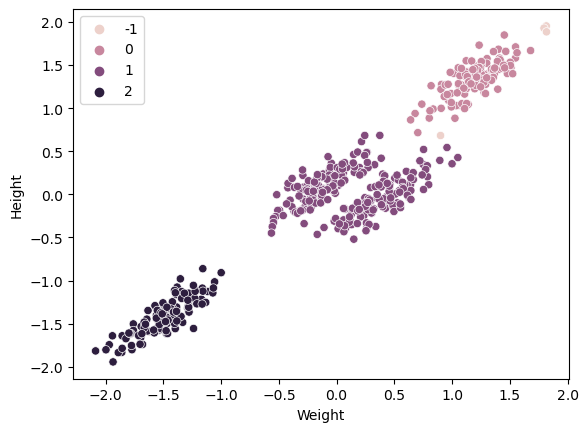

In [63]:
sns.scatterplot(x=ndf['Weight'],y=ndf['Height'],hue=labels)